In [1]:
library(forecast)
library(zoo)
library(ggplot2)


Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



In [2]:
hp <- read.zoo("../data/0933OS_Code/Chapter 1/UKHP.csv", sep=",", header=TRUE, format="%Y-%m", FUN= as.yearmon)

Don't know how to automatically pick scale for object of type yearmon. Defaulting to continuous.


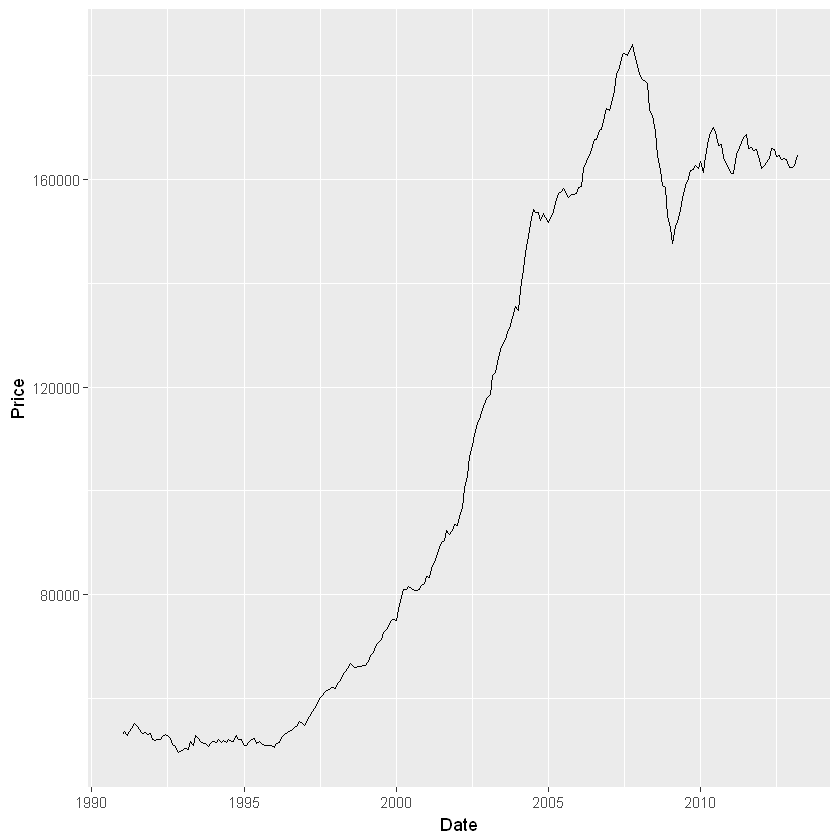

In [3]:
ggplot(aes(x=Index, y=Value), data=fortify(hp, melt=TRUE)) +
    geom_line() +
    labs(x='Date', y='Price')

In [4]:
frequency(hp)

[1] 12

In [5]:
hp_ret <- diff(hp) / lag(hp, k=-1)*100

Don't know how to automatically pick scale for object of type yearmon. Defaulting to continuous.


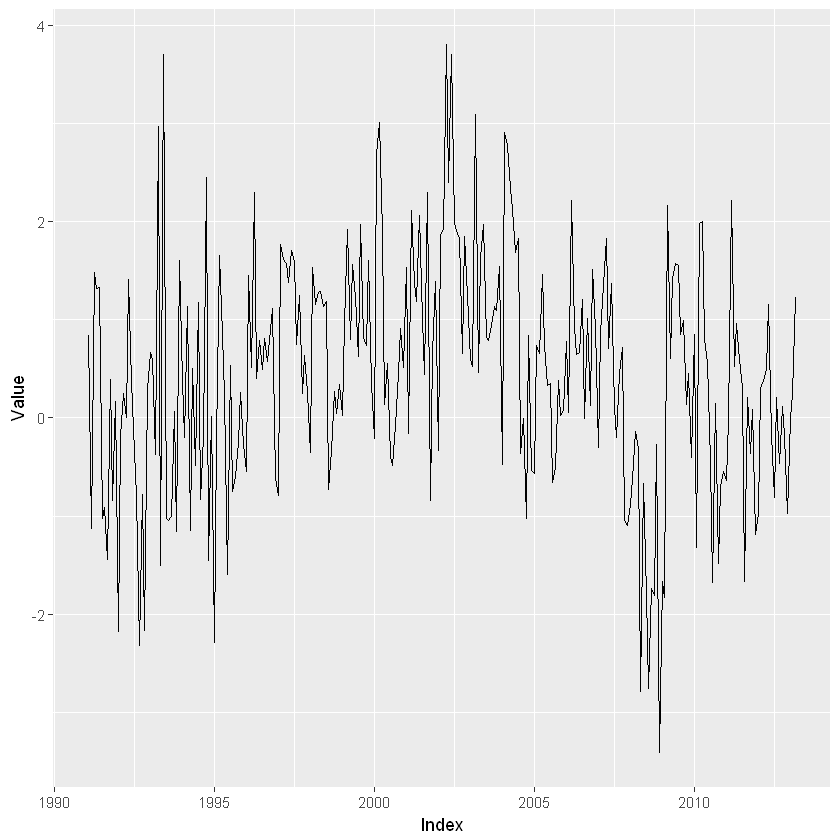

In [6]:
ggplot(aes(x=Index, y=Value), data=fortify(hp_ret, melt=TRUE)) +
    geom_line()

In [25]:
(mod <- auto.arima(hp_ret, stationary=TRUE, seasonal=FALSE, ic='aic'))
# auto.arima(hp_ret, stationary=TRUE, seasonal=FALSE, ic='aic', fixed=c(0,NA))
# auto.arima(hp_ret, stationary=TRUE, seasonal=FALSE, ic='aic', fixed=c(NA,0))

Series: hp_ret 
ARIMA(2,0,0)            with non-zero mean 

Coefficients:
         ar1     ar2    mean
      0.2299  0.3491  0.4345
s.e.  0.0573  0.0575  0.1519

sigma^2 estimated as 1.118:  log likelihood=-390.97
AIC=789.94   AICc=790.1   BIC=804.28

In [14]:
confint(mod)

,2.5 %,97.5 %
ar1,0.1174881,0.3422486
ar2,0.2364347,0.4617421
intercept,0.1368785,0.7321623


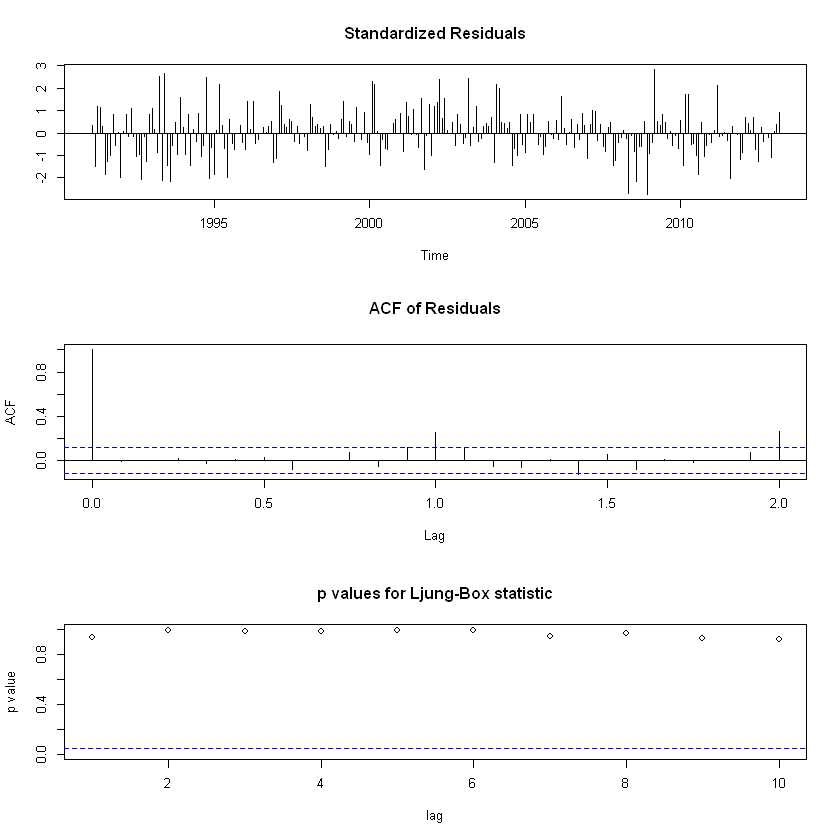

In [36]:
tsdiag(mod)
# 표준화된 잔차 값에서 변동 클러스터들이 보이지 않음
# ACF plot에서 잔차들 사이에 자기 상관성이 보이지 않음
# 자기 상관성의 Ljung-Box 테스트가 높은 p-value를 주므로 자기 상관성들이 서로 독립적이라는 귀무가설을 기각할 수 없음

In [67]:
#attr(mod,'names')
#attr(mod,'class')
#attr(mod$coef,'names')
str(mod)

List of 18
 $ coef     : Named num [1:3] 0.23 0.349 0.435
  ..- attr(*, "names")= chr [1:3] "ar1" "ar2" "intercept"
 $ sigma2   : num 1.12
 $ var.coef : num [1:3, 1:3] 3.29e-03 -1.19e-03 4.38e-05 -1.19e-03 3.30e-03 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:3] "ar1" "ar2" "intercept"
  .. ..$ : chr [1:3] "ar1" "ar2" "intercept"
 $ mask     : logi [1:3] TRUE TRUE TRUE
 $ loglik   : num -391
 $ aic      : num 790
 $ arma     : int [1:7] 2 0 0 0 12 0 0
 $ residuals: Time-Series [1:266] from 1991 to 2013: 0.354 -1.599 1.266 1.191 0.322 ...
 $ call     : language auto.arima(y = hp_ret, stationary = TRUE, seasonal = FALSE, ic = "aic",      x = list(x = c(0.838799668250019, -1| __truncated__ ...
 $ series   : chr "hp_ret"
 $ code     : int 0
 $ n.cond   : int 0
 $ nobs     : int 266
 $ model    :List of 10
  ..$ phi  : num [1:2] 0.23 0.349
  ..$ theta: num 0
  ..$ Delta: num(0) 
  ..$ Z    : num [1:2] 1 0
  ..$ a    : num [1:2] 0.7903 -0.0671
  ..$ P    : num [1:2, 1:2] 0 0 0 0

Don't know how to automatically pick scale for object of type ts. Defaulting to continuous.


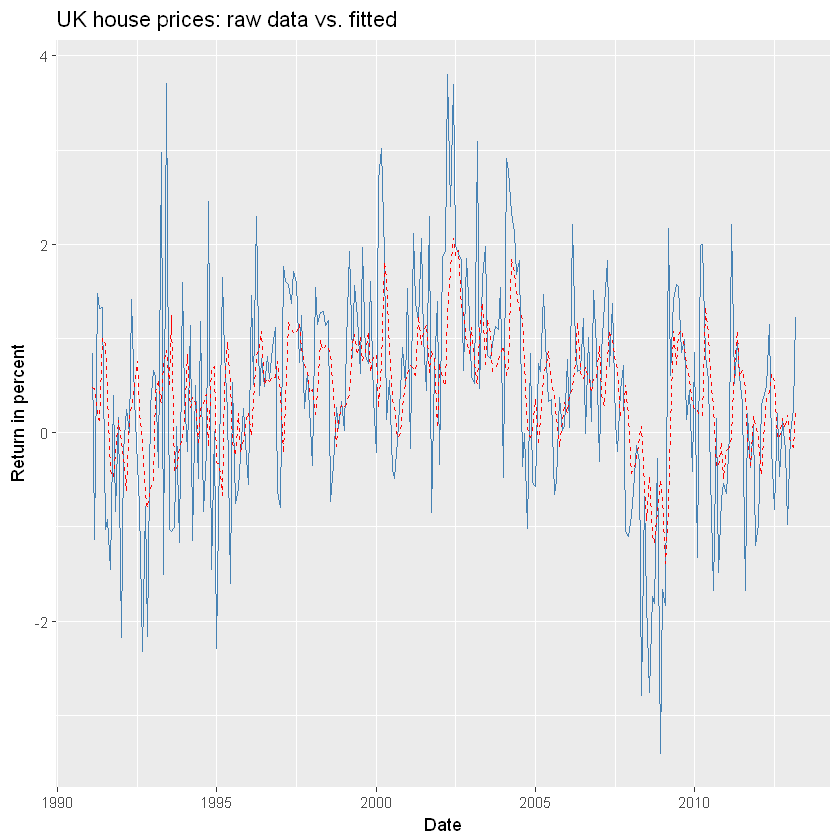

In [122]:
#index(mod$x)
ggplot() +
    geom_line(aes(x=index(mod$x), y=mod$x), color='steelblue', size=0.5) + 
    geom_line(aes(x=index(mod$fitted), y=mod$fitted), color='red', linetype='dashed', size=0.5) +
    labs(x='Date', y='Return in percent', title='UK house prices: raw data vs. fitted')

In [123]:
accuracy(mod)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.001203096,1.051422,0.8059929,-Inf,Inf,0.7154503,-0.004848183


In [124]:
predict(mod, n.ahead=3)

$pred
           Apr       May       Jun
2013 0.5490544 0.7367277 0.5439708

$se
          Apr      May      Jun
2013 1.057401 1.084978 1.165247


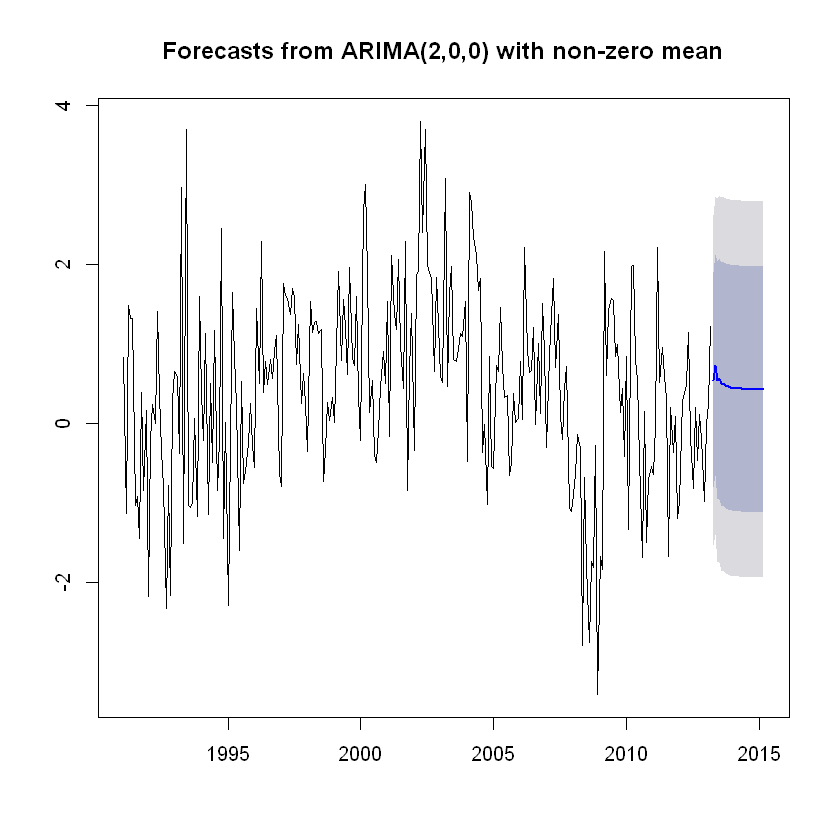

In [128]:
plot(forecast(mod))